# Install the necessary python libraries

In [13]:
import networkx as nx
import numpy as np
import pandas as pd

# Graph distance

Graph distances:
('A', 'C') | 2
('C', 'D') | 2
('A', 'E') | 3


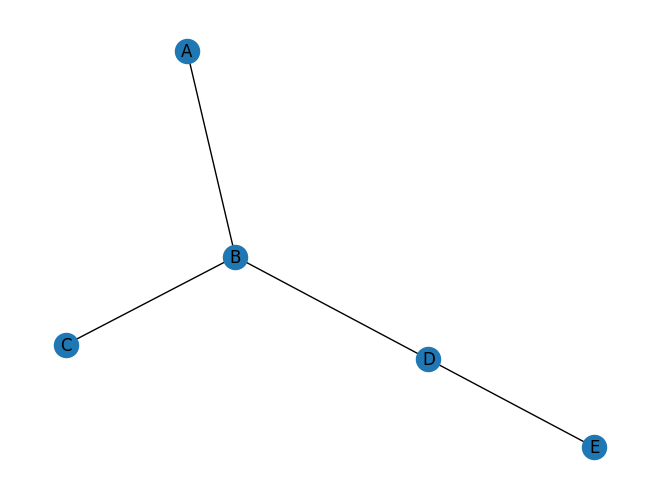

In [22]:
# Calculate graph distance
def calculate_graph_distance(G, source, target):
    return nx.shortest_path_length(G, source=source, target=target)

# Instantiate the graph
G = nx.Graph()

edges = [("A", "B"), ("B", "C"), ("B", "D"), ("D", "E")]
# add node/edge pairs
G.add_edges_from(edges)

# Use spring layout for better visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Calculate distances
distances = {
    ("A", "C"): calculate_graph_distance(G, 'A', 'C'),
    ("C", "D"): calculate_graph_distance(G, 'C', 'D'),
    ("A", "E"): calculate_graph_distance(G, 'A', 'E'),
}

print("Graph distances:")
for nodes, distance in distances.items():
    print(f"{nodes} | {distance}")

# Common neighbours

The common neighbors of nodes 6 and 9 are: [1, 8, 10]


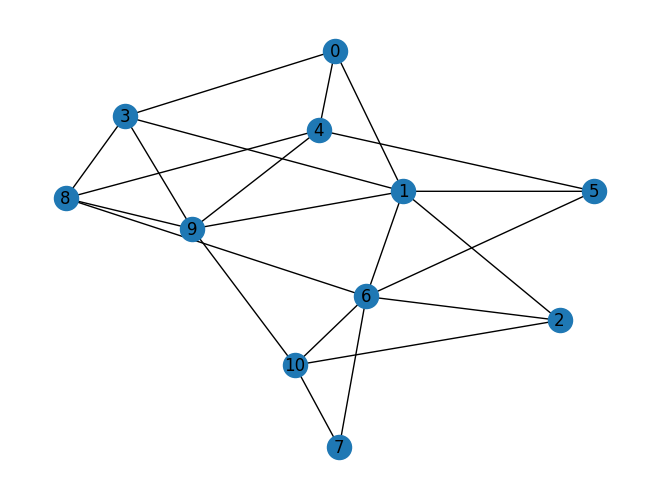

In [15]:
# Instantiate the graph
G = nx.Graph()

# Define edges
edges = [(0, 1), (1, 2), (0, 3), (1, 3), (0, 4), (1, 5), (4, 5), (1, 6), 
         (2, 6), (5, 6), (6, 7), (3, 8), (4, 8), (6, 8), (3, 9), (4, 9), 
         (1, 9), (8, 9), (2, 10), (6, 10), (7, 10), (9, 10)]

# Add edges to the graph
G.add_edges_from(edges)

# Use spring layout for better visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Calculate common neighbors of nodes 6 and 9
cn_list = sorted(nx.common_neighbors(G, 6, 9))

# Print common neighbors
print(f"The common neighbors of nodes 6 and 9 are: {cn_list}")

# Jaccard’s coefficient of node pairs

In [16]:
# Define list of node pairs
node_list = [(6, 9), (1, 3), (3, 9)]

# Calculate Jaccard coefficients for each pair
coefficients = {}
preds = nx.jaccard_coefficient(G, node_list)
for u, v, p in preds:
    coefficients[(u, v)] = p

# Print Jaccard coefficients
for nodes, coeff in coefficients.items():
    print(f"The Jaccard coefficient of nodes {nodes} is: {coeff:.8f}")

The Jaccard coefficient of nodes (6, 9) is: 0.37500000
The Jaccard coefficient of nodes (1, 3) is: 0.25000000
The Jaccard coefficient of nodes (3, 9) is: 0.28571429


#  Adamic-Adar of node pairs

In [17]:
# Define list of node pairs
node_list = [(6, 9), (1, 3), (3, 9)]

# Calculate Adamic-Adar indices for each pair
indices = {}
preds = nx.adamic_adar_index(G, node_list)
for u, v, p in preds:
    indices[(u, v)] = p

# Print Adamic-Adar indices
for nodes, index in indices.items():
    print(f"The Adamic-Adar index of nodes {nodes} is: {index:.8f}")

The Adamic-Adar index of nodes (6, 9) is: 2.00080567
The Adamic-Adar index of nodes (1, 3) is: 1.53157416
The Adamic-Adar index of nodes (3, 9) is: 1.27945815


# Preferential attachment (PA) of node pairs

In [18]:
# Define list of node pairs
node_list = [(6, 9), (1, 3), (3, 9)]

# Calculate Preferential Attachment scores for each pair
scores = {}
preds = nx.preferential_attachment(G, node_list)
for u, v, p in preds:
    scores[(u, v)] = p

# Print Preferential Attachment scores
for nodes, score in scores.items():
    print(f"The Preferential Attachment score of nodes {nodes} is: {score:.8f}")

The Preferential Attachment score of nodes (6, 9) is: 30.00000000
The Preferential Attachment score of nodes (1, 3) is: 24.00000000
The Preferential Attachment score of nodes (3, 9) is: 20.00000000


# SimRank similarity

In [19]:
# Define source and target nodes
source = 6
target = 9

# Calculate SimRank similarity between source and target
similarity = nx.simrank_similarity(G, source, target)

# Print SimRank similarity
print(f"The SimRank similarity between nodes {source} and {target} is: {similarity}")

The SimRank similarity between nodes 6 and 9 is: 0.4283123305678891


# Neo4j
## Create Database

In [ ]:
CREATE (zhen:Person {name: 'Zhen'}), (praveena:Person {name: 'Praveena'}), (michael:Person {name: 'Michael'}), (arya:Person {name: 'Arya'}), (karin:Person {name: 'Karin'}), (zhen)-[:FRIENDS]->(arya), (zhen)-[:FRIENDS]->(praveena), (praveena)-[:WORKS_WITH]->(karin), (praveena)-[:FRIENDS]->(michael), (michael)-[:WORKS_WITH]->(karin), (arya)-[:FRIENDS]->(karin)


## Compute Graph algorithms

In [ ]:
MATCH (p1:Person {name: 'Michael'}) MATCH (p2:Person {name: 'Karin'}) RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2) AS score


In [ ]:
MATCH (p1:Person {name: 'Michael'}) MATCH (p2:Person {name: 'Karin'}) RETURN gds.alpha.linkprediction.commonNeighbors(p1, p2, {relationshipQuery: "FRIENDS"}) AS score


In [ ]:
MATCH (p1:Person {name: 'Michael'}) MATCH (p2:Person {name: 'Karin'}) RETURN gds.alpha.linkprediction.adamicAdar(p1, p2) AS score


In [ ]:
MATCH (p1:Person {name: 'Michael'}) MATCH (p2:Person {name: 'Karin'}) RETURN gds.alpha.linkprediction.adamicAdar(p1, p2, {relationshipQuery: 'FRIENDS'}) AS score
